<a href="https://colab.research.google.com/github/BiancagscCabral/DataScience/blob/main/Atividade%2003%20Titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [5]:
df = pd.read_csv('train.csv')
df_original_para_graficos = df.copy()
print("Informações Iniciais do Dataset")
df.info()
print("\n")

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

numeric_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Informações Iniciais do Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




In [6]:


# Carregarando o arquivo
df = pd.read_csv('train.csv')

# 1. Tratando os Dados Ausentes

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

df.drop('Cabin', axis=1, inplace=True)

#  2. Tradução da coluna 'Sex'
sex_map = {
    'male': 'masculino',
    'female': 'feminino'
}
df['Sex'] = df['Sex'].map(sex_map)

# --- 3. Tradução da coluna 'Embarked'
embarked_map = {
    'S': 'Southampton',
    'C': 'Cherburgo',
    'Q': 'Queenstown' # Mantido para corresponder à instrução, embora o nome histórico seja outro.
}
df['Embarked'] = df['Embarked'].map(embarked_map)


# Salvar o DataFrame tratado em um novo arquivo CSV
output_file = 'titanic_tratado.csv'
df.to_csv(output_file, index=False)

# Exibir um resumo das alterações e as primeiras linhas do novo DataFrame
print("Tratamento de dados concluído com sucesso!")
print("\nResumo das ações:")
print(f"- Dados ausentes em 'Age' foram preenchidos com a mediana: {median_age:.2f}")
print(f"- Dados ausentes em 'Embarked' foram preenchidos com a moda: {mode_embarked}")
print("- A coluna 'Cabin' foi removida por ter um excesso de valores ausentes.")
print("- A coluna 'Sex' foi traduzida para português.")
print("- A coluna 'Embarked' teve seus códigos traduzidos para os nomes dos portos.")

print(f"\nO arquivo com os dados tratados foi salvo como: '{output_file}'")

print("\n\nAs 5 primeiras linhas do arquivo tratado:")
print(df.head())

# Verificar se ainda existem dados ausentes
print("\n\nVerificação final de dados ausentes no novo arquivo:")
print(df.isnull().sum())

Tratamento de dados concluído com sucesso!

Resumo das ações:
- Dados ausentes em 'Age' foram preenchidos com a mediana: 28.00
- Dados ausentes em 'Embarked' foram preenchidos com a moda: S
- A coluna 'Cabin' foi removida por ter um excesso de valores ausentes.
- A coluna 'Sex' foi traduzida para português.
- A coluna 'Embarked' teve seus códigos traduzidos para os nomes dos portos.

O arquivo com os dados tratados foi salvo como: 'titanic_tratado.csv'


As 5 primeiras linhas do arquivo tratado:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name        Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris  masculino  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   feminino  38.0      1   
2                             Heikkinen, M

/tmp/ipython-input-1619334216.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-1619334216.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [7]:


# Carregar o arquivo CSV tratado anteriormente
try:
    df = pd.read_csv('titanic_tratado.csv')
except FileNotFoundError:
    print("O arquivo 'titanic_tratado.csv' não foi encontrado.")
    print("Por favor, execute o passo de tratamento de dados ausentes primeiro.")
    exit()

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Criar cópias dos mapeamentos para exibir ao usuário
sex_mapping = dict(zip(df['Sex'].unique(), label_encoder.fit_transform(df['Sex'].unique())))
embarked_mapping = dict(zip(df['Embarked'].unique(), label_encoder.fit_transform(df['Embarked'].unique())))


# Aplicar o LabelEncoder na coluna 'Sex'
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Aplicar o LabelEncoder na coluna 'Embarked'
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Salvar o novo DataFrame em um arquivo CSV
output_file_numeric = 'titanic_numerico.csv'
df.to_csv(output_file_numeric, index=False)

# Exibir os resultados e os mapeamentos para o usuário
print("Transformação de dados categóricos em numéricos concluída!")
print("\nAs seguintes colunas foram transformadas:")

print("\n1. Coluna 'Sex':")
print("Mapeamento criado:")
for category, code in sex_mapping.items():
    print(f"- '{category}' foi transformado para o número {code}")


print("\n2. Coluna 'Embarked':")
print("Mapeamento criado:")
for category, code in embarked_mapping.items():
    print(f"- '{category}' foi transformado para o número {code}")


print(f"\nO novo arquivo com os dados numéricos foi salvo como: '{output_file_numeric}'")

print("\n\nAs 5 primeiras linhas do novo arquivo:")
print(df.head())

Transformação de dados categóricos em numéricos concluída!

As seguintes colunas foram transformadas:

1. Coluna 'Sex':
Mapeamento criado:
- 'masculino' foi transformado para o número 1
- 'feminino' foi transformado para o número 0

2. Coluna 'Embarked':
Mapeamento criado:
- 'Southampton' foi transformado para o número 2
- 'Cherburgo' foi transformado para o número 0
- 'Queenstown' foi transformado para o número 1

O novo arquivo com os dados numéricos foi salvo como: 'titanic_numerico.csv'


As 5 primeiras linhas do novo arquivo:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2  

In [8]:


# Carregar o arquivo CSV numérico
try:
    df = pd.read_csv('titanic_numerico.csv')
except FileNotFoundError:
    print("O arquivo 'titanic_numerico.csv' não foi encontrado.")
    print("Por favor, execute o passo de transformação de categóricos para numéricos primeiro.")
    exit()

# Colunas que não são features para o modelo e devem ser removidas antes da modelagem.
# 'PassengerId' é apenas um identificador.
# 'Name' e 'Ticket' têm alta cardinalidade e não serão usadas em modelos simples.
df_model = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Identificar as colunas a serem padronizadas
# Geralmente, aplicamos a padronização em features contínuas.
# 'Age' e 'Fare' são as candidatas ideais.
cols_to_scale = ['Age', 'Fare']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o scaler nas colunas selecionadas
# O scaler retorna um array numpy, então criamos um novo DataFrame
# com os dados escalados e mantemos os nomes das colunas.
df_scaled_cols = pd.DataFrame(scaler.fit_transform(df_model[cols_to_scale]), columns=cols_to_scale)

# Atualizar as colunas originais com os valores padronizados
df_model[cols_to_scale] = df_scaled_cols

# Salvar o DataFrame final e padronizado em um novo arquivo CSV
output_file_scaled = 'titanic_padronizado.csv'
df_model.to_csv(output_file_scaled, index=False)


# Exibir os resultados para o usuário
print("Padronização de dados concluída com sucesso!")
print("\nAs seguintes colunas foram padronizadas usando StandardScaler (média 0, desvio padrão 1):")
print(f"- {cols_to_scale[0]}")
print(f"- {cols_to_scale[1]}")

print("\nAs colunas 'PassengerId', 'Name' e 'Ticket' foram removidas pois não serão utilizadas no treinamento do modelo.")

print(f"\nO arquivo final, pronto para a modelagem, foi salvo como: '{output_file_scaled}'")

print("\n\nAs 5 primeiras linhas do novo arquivo padronizado:")
print(df_model.head())

print("\n\nVerificação da média e desvio padrão das colunas padronizadas (devem ser aprox. 0 e 1):")
print(df_model[cols_to_scale].describe())

Padronização de dados concluída com sucesso!

As seguintes colunas foram padronizadas usando StandardScaler (média 0, desvio padrão 1):
- Age
- Fare

As colunas 'PassengerId', 'Name' e 'Ticket' foram removidas pois não serão utilizadas no treinamento do modelo.

O arquivo final, pronto para a modelagem, foi salvo como: 'titanic_padronizado.csv'


As 5 primeiras linhas do novo arquivo padronizado:
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.565736      1      0 -0.502445         2
1         1       1    0  0.663861      1      0  0.786845         0
2         1       3    0 -0.258337      0      0 -0.488854         2
3         1       1    0  0.433312      1      0  0.420730         2
4         0       3    1  0.433312      0      0 -0.486337         2


Verificação da média e desvio padrão das colunas padronizadas (devem ser aprox. 0 e 1):
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.98733

In [9]:


# Carregar o arquivo com os dados numéricos (antes da padronização)
# para que as estatísticas sejam interpretáveis
try:
    df = pd.read_csv('titanic_numerico.csv')
except FileNotFoundError:
    print("O arquivo 'titanic_numerico.csv' não foi encontrado.")
    print("Por favor, execute os passos anteriores de pré-processamento.")
    exit()

print("--- Análise Descritiva do Conjunto de Dados Titanic ---\n")

# 1. Média, Mediana, Desvio Padrão (e outras estatísticas) com .describe()
print("1. Resumo Estatístico (Média, Mediana, Desvio Padrão, etc.):")
# Traduzindo o índice para melhor entendimento
estatisticas_descritivas = df.describe()
estatisticas_descritivas.index = [
    'Contagem', 'Média', 'Desvio Padrão', 'Mínimo',
    '25% (1º Quartil)', '50% (Mediana)', '75% (3º Quartil)', 'Máximo'
]
print(estatisticas_descritivas)
print("\n" + "="*50 + "\n")

# 2. Moda
print("2. Moda (valor mais frequente) para cada coluna:")
moda = df.mode().iloc[0] # Pega a primeira linha caso haja mais de uma moda
print(moda)
print("\n" + "="*50 + "\n")


# 3. Frequências para as principais colunas categóricas/discretas
print("3. Frequências das principais colunas:")

# Frequência de Sobreviventes
print("\n--- Frequência de Sobrevivência ---")
freq_survived = df['Survived'].value_counts()
freq_survived.index = freq_survived.index.map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})
print(freq_survived)

# Frequência por Classe
print("\n--- Frequência por Classe (Pclass) ---")
freq_pclass = df['Pclass'].value_counts()
freq_pclass.index = freq_pclass.index.map({1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})
print(freq_pclass)

# Frequência por Sexo
print("\n--- Frequência por Sexo ---")
freq_sex = df['Sex'].value_counts()
freq_sex.index = freq_sex.index.map({1: 'Masculino', 0: 'Feminino'})
print(freq_sex)

# Frequência por Porto de Embarque
print("\n--- Frequência por Porto de Embarque (Embarked) ---")
freq_embarked = df['Embarked'].value_counts()
freq_embarked.index = freq_embarked.index.map({2: 'Southampton', 0: 'Cherburgo', 1: 'Queenstown'})
print(freq_embarked)

--- Análise Descritiva do Conjunto de Dados Titanic ---

1. Resumo Estatístico (Média, Mediana, Desvio Padrão, etc.):
                  PassengerId    Survived      Pclass         Sex         Age  \
Contagem           891.000000  891.000000  891.000000  891.000000  891.000000   
Média              446.000000    0.383838    2.308642    0.647587   29.361582   
Desvio Padrão      257.353842    0.486592    0.836071    0.477990   13.019697   
Mínimo               1.000000    0.000000    1.000000    0.000000    0.420000   
25% (1º Quartil)   223.500000    0.000000    2.000000    0.000000   22.000000   
50% (Mediana)      446.000000    0.000000    3.000000    1.000000   28.000000   
75% (3º Quartil)   668.500000    1.000000    3.000000    1.000000   35.000000   
Máximo             891.000000    1.000000    3.000000    1.000000   80.000000   

                       SibSp       Parch        Fare    Embarked  
Contagem          891.000000  891.000000  891.000000  891.000000  
Média             

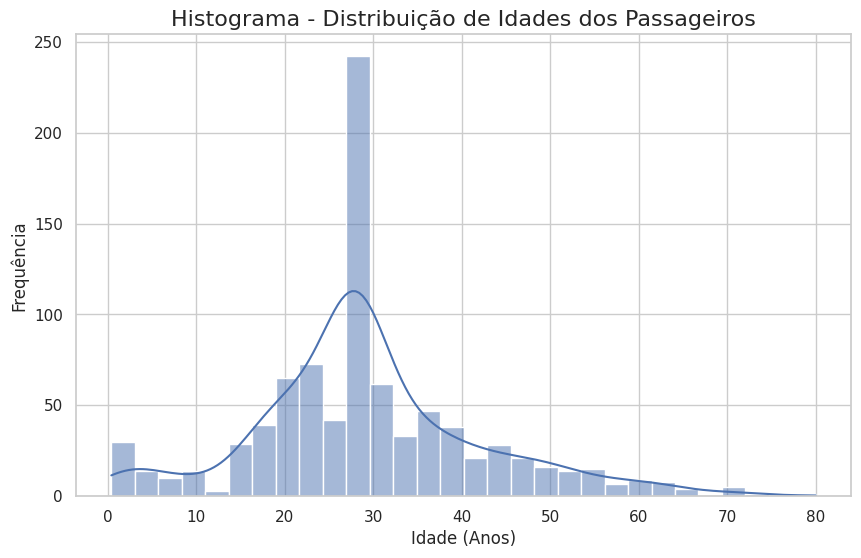

Gráfico 'histograma_idade.png' gerado.


In [17]:
# Configurar estilo dos gráficos
sns.set_theme(style="whitegrid")

# Carregar o arquivo com os dados tratados (com textos, para melhores legendas)
try:
    df = pd.read_csv('titanic_tratado.csv')
except FileNotFoundError:
    print("O arquivo 'titanic_tratado.csv' não foi encontrado.")
    exit()

# --- 1. Histograma: Distribuição de Idades ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Histograma - Distribuição de Idades dos Passageiros', fontsize=16)
plt.xlabel('Idade (Anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.savefig('histograma_idade.png')
plt.show()
plt.close()
print("Gráfico 'histograma_idade.png' gerado.")

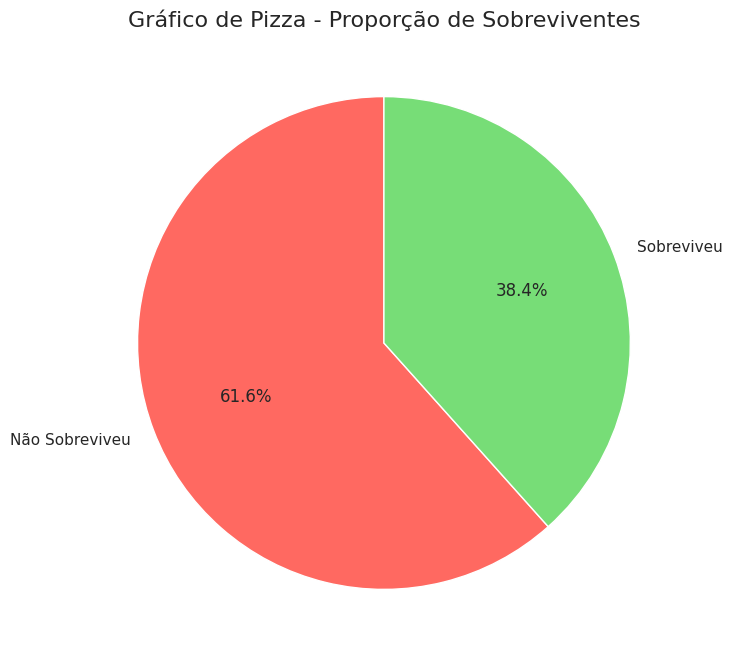

Gráfico 'pizza_sobreviventes.png' gerado.


In [18]:
# --- 2. Gráfico de Pizza: Proporção de Sobreviventes ---
plt.figure(figsize=(8, 8))
# Mapear os valores para rótulos mais claros
sobreviventes_map = df['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})
sobreviventes_counts = sobreviventes_map.value_counts()
plt.pie(sobreviventes_counts, labels=sobreviventes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff6961', '#77dd77'])
plt.title('Gráfico de Pizza - Proporção de Sobreviventes', fontsize=16)
plt.ylabel('') # Remover o label do eixo y
plt.show('pizza_sobreviventes.png')
plt.close()
print("Gráfico 'pizza_sobreviventes.png' gerado.")

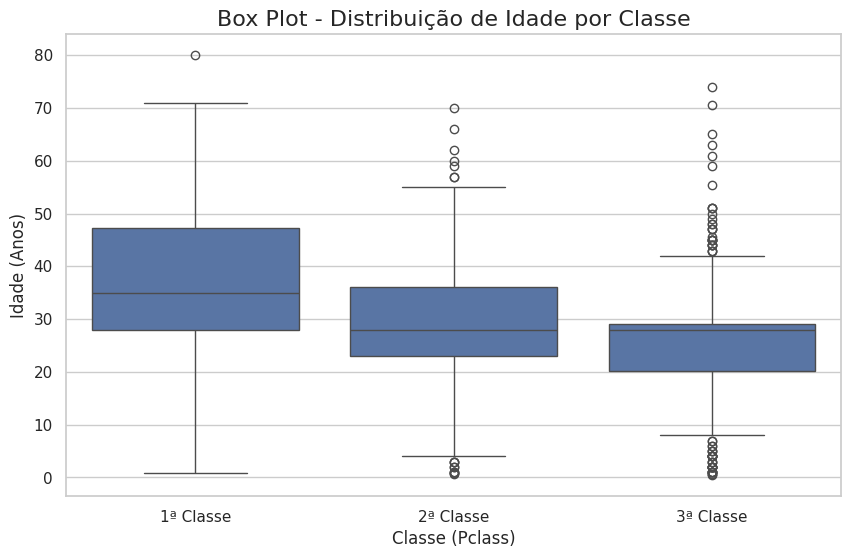

Gráfico 'boxplot_idade_por_classe.png' gerado.


In [19]:
# --- 3. Gráfico de Caixas (Box Plot): Idade por Classe Social ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Box Plot - Distribuição de Idade por Classe', fontsize=16)
plt.xlabel('Classe (Pclass)', fontsize=12)
plt.ylabel('Idade (Anos)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show('boxplot_idade_por_classe.png')
plt.close()
print("Gráfico 'boxplot_idade_por_classe.png' gerado.")


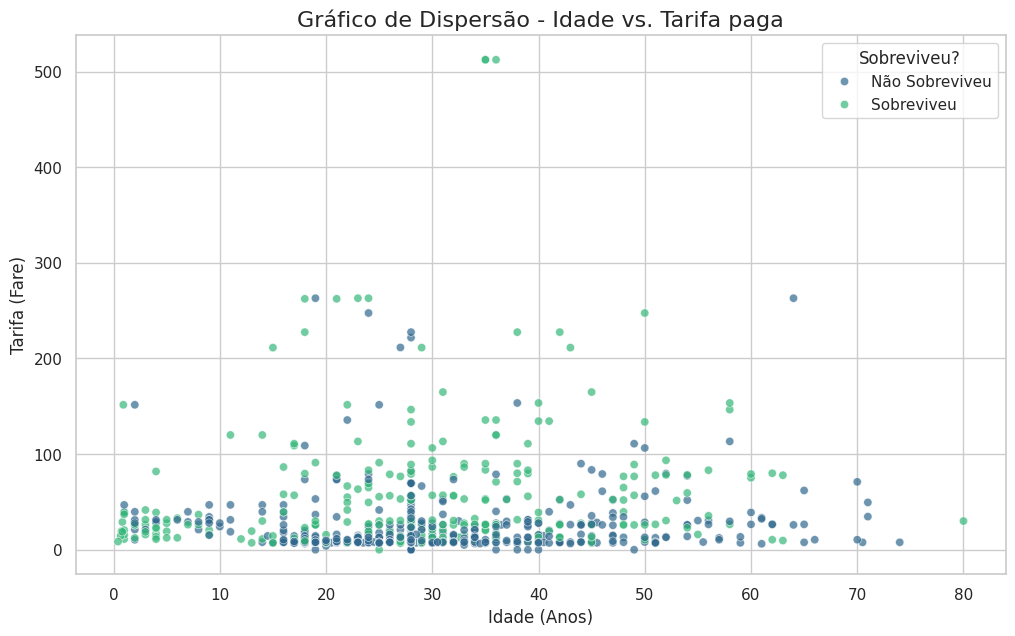

Gráfico 'dispersao_idade_vs_tarifa.png' gerado.


In [20]:
# --- 4. Gráfico de Dispersão: Idade vs. Tarifa ---
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='viridis', alpha=0.7)
plt.title('Gráfico de Dispersão - Idade vs. Tarifa paga', fontsize=16)
plt.xlabel('Idade (Anos)', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
# Melhorar a legenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Não Sobreviveu', 'Sobreviveu'], title='Sobreviveu?')
plt.show('dispersao_idade_vs_tarifa.png')
plt.close()
print("Gráfico 'dispersao_idade_vs_tarifa.png' gerado.")